## Datan analysointi K2020_2 - RATKAISUT - Tehtävät kerta 5

Palauta Optiman palautuslaatikkoon viimeistään su 15.3. Kirjoita palautuslaatikon kommenttikenttään, mitkä tehtävät olet tehnyt kokonaan/osittain.

**Opiskelijan nimi:**

## 1. Autoja

Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/golf.zip on tietoja Trafin tiedoissa olevista VW Golf  -autoista.

Lue tiedot DataFrameen ja erota kayttoonottopvm-kentästä käyttöönottovuosi.

Tee sitten
* histogrammi käyttöönottovuodesta
* histogrammi matkamittarin lukemasta, rajaa pois yli 500 000 kilometrin lukemat
* jointplot käyttöönottovuosi<->CO2-päästöt 
* jointplot omamassa<->suurinNettoteho (rajaa selvästi muista poikkeavat omamassa-arvot pois)
* violinplot käyttöönottovuodesta käyttövoiman (yksittaisKayttovoima) mukaan. Ota mukaan vain käyttövoiman arvot 1.0 = bensiini, 2.0 = diesel

Index(['Unnamed: 0', 'ajoneuvoluokka', 'ensirekisterointipvm', 'ajoneuvoryhma',
       'ajoneuvonkaytto', 'variantti', 'versio', 'kayttoonottopvm', 'vari',
       'ovienLukumaara', 'korityyppi', 'ohjaamotyyppi', 'istumapaikkojenLkm',
       'omamassa', 'teknSuurSallKokmassa', 'tieliikSuurSallKokmassa',
       'ajonKokPituus', 'ajonLeveys', 'ajonKorkeus', 'kayttovoima',
       'iskutilavuus', 'suurinNettoteho', 'sylintereidenLkm', 'ahdin',
       'sahkohybridi', 'sahkohybridinluokka', 'merkkiSelvakielinen',
       'mallimerkinta', 'vaihteisto', 'vaihteidenLkm', 'kaupallinenNimi',
       'voimanvalJaTehostamistapa', 'tyyppihyvaksyntanro',
       'yksittaisKayttovoima', 'kunta', 'Co2', 'matkamittarilukema',
       'valmistenumero2', 'jarnro', 'ev', 'ev1'],
      dtype='object')


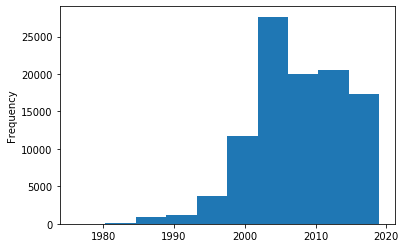

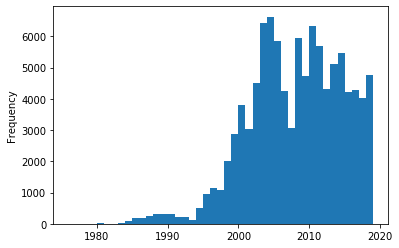

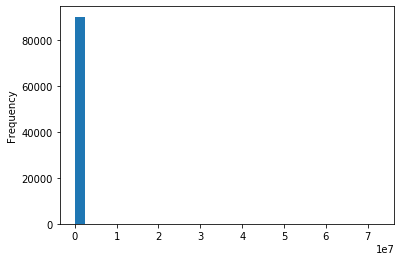

86081    72728078.0
51455    32721514.0
19808    25374932.0
54571     8100015.0
60193     7223175.0
3635      7155214.0
26742     5785342.0
16007     5542524.0
19018     5509163.0
15481     5035393.0
Name: matkamittarilukema, dtype: float64


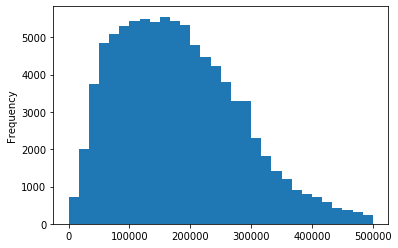

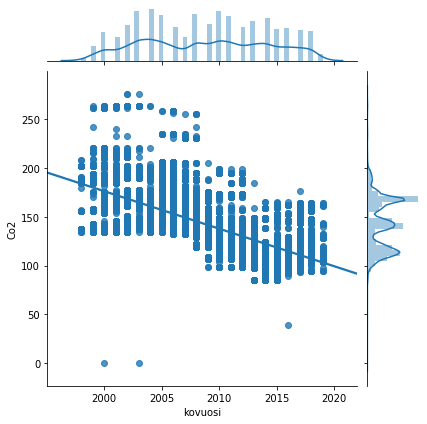

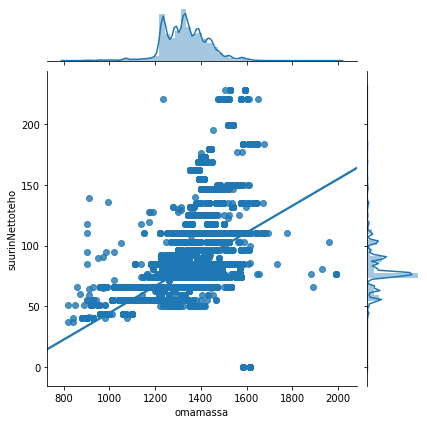

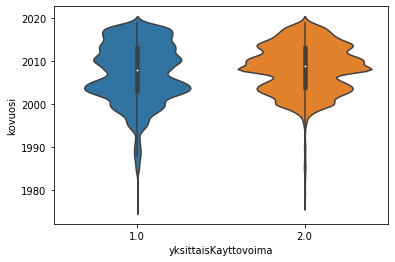

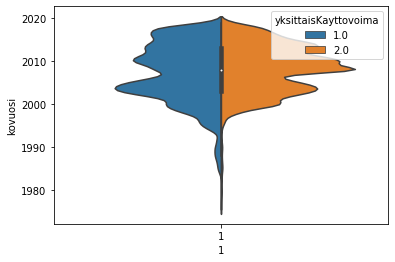

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/golf.zip')

print(df.columns)

#kayttoonottopvm-kentästä käyttöönottovuosi
df['kovuosi'] = df['kayttoonottopvm'].astype(str).str[:4].astype(int)



#histogrammi käyttöönottovuodesta 
df['kovuosi'].plot.hist()
plt.show()

#histogrammi käyttöönottovuodesta vuosittain
df['kovuosi'].plot.hist(bins=df['kovuosi'].max()-df['kovuosi'].min())
plt.show()

#histogrammi matkamittarin lukemasta
df['matkamittarilukema'].plot.hist(bins=30)
plt.show()

#matkamittarilukemassa on jotain virheellisiä arvoja
print(df['matkamittarilukema'].sort_values(ascending=False).head(10))

#tyydytään alle puolen miljoonan kilometrin lukemiin
df[df['matkamittarilukema']<500000]['matkamittarilukema'].plot.hist(bins=30)
plt.show()

#jointplot käyttöönottovuodesta<->C02-päästöistä
sns.jointplot('kovuosi', 'Co2', data=df, kind='reg')
plt.show()





#jointplot omamassa<->suurinNettoteho, rajataan yli 3-tonniset ja alle 0,1-tonniset pois
sns.jointplot('omamassa', 'suurinNettoteho', data=df[(df['omamassa']<3000) & (df['omamassa']>100)], kind='reg')
plt.show()

#violinplot käyttöönottovuodesta käyttövoiman mukaan
sns.violinplot(x='yksittaisKayttovoima',  y='kovuosi',  data=df[df['yksittaisKayttovoima'].isin([1.0,2.0])])
plt.show()

#samaan viuluun ne saa antamalla x:ksi jonkun joka on kaikilla riveillä sama
df['1']=1
sns.violinplot(x='1',  y='kovuosi', hue='yksittaisKayttovoima', split =True, data=df[df['yksittaisKayttovoima'].isin([1.0,2.0])])
plt.show()

## 2. Muotoilut
Alla on annettu kaavion luontikoodi (käyttäen np-taulukoita). Tee kaaviosta yksityiskohtaisesti alla olevan mallin mukainen. Tutki [matplotlibin speksistä](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot), miten kaavion osia muotoillaan.  

![malli](https://student.labranet.jamk.fi/~varpe/datananal1k2020/kerta5/kaavio2.png)

leikkauspiste -teksti on manuaalisesti asettetu, ei siis tarvitse erikseen laskea leikkauspistettä

C:\Users\Pekka\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


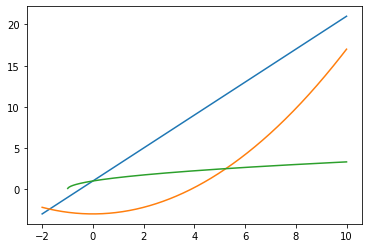

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


x = np.linspace(-2,10,1000)
y1 =  2*x +1
y2 = 0.2*x**2-3
y3 = (x+1)**0.5
fig, ax = plt.subplots()
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

plt.show()

C:\Users\Pekka\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


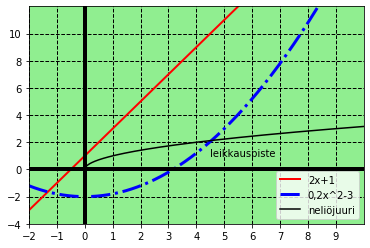

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x = np.linspace(-2,10,1000)
y1 =  2*x +1
y2 = 0.2*x**2-2
y3 = (x)**0.5
fig, ax = plt.subplots()


plt.plot(x, y1, 'r-', linewidth=2)
plt.plot(x, y2, 'b-.', linewidth=3)
plt.plot(x, y3, 'k-')

plt.axis([-2,10,-4,12])

plt.xticks(np.arange(-2, 10, step=1))
plt.yticks(np.arange(-4, 12, step=2))
plt.grid(color='k', linestyle='--', linewidth=1)
plt.axhline(linewidth=4, color="k")
plt.axvline(linewidth=4, color="k")
plt.annotate('leikkauspiste', (4.5,1))
plt.legend(['2x+1','0,2x^2-3','neliöjuuri'],loc='lower right' )
ax.set_facecolor('lightgreen')
plt.show()

## 3. Liikennetietoja
Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/lam_raw.csv on yhden päivän tietoja eräältä automaattiselta liikennemittausasemalta ([LAM](https://vayla.fi/avoindata/tietoaineistot/lam-tiedot)). Erotin on puolipiste, mutta datatiedostossa ei ole otsikkoriviä. Kentät ovat järjestyksessä:  

* pistetunnus
* vuosi
* päivän järjestysnumero
* tunti
* minuutti
* sekunti
* sadasosasekunti
* pituus (m)
* kaista
* suunta
* ajoneuvoluokka
* nopeus (km/h)
* faulty (0 = validi havainto, 1=virheellinen havainto)
* kokonaisaika (tekninen)
* aikaväli (tekninen)
* jonoalku (tekninen)


Lue tiedot DataFrameen ja poista virheelliset havainnot.
Tutki sitten sopivien kaavioiden avulla suunnan, ajoneuvoluokan ja kellonajan (esim tunti) vaikutusta nopeusjakaumaan.

0    39923
1       28
Name: faulty, dtype: int64


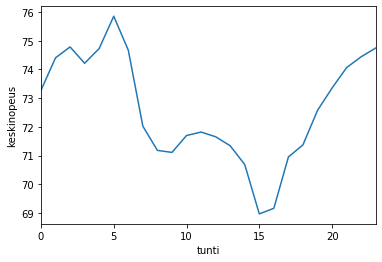

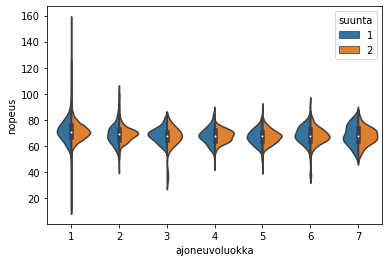

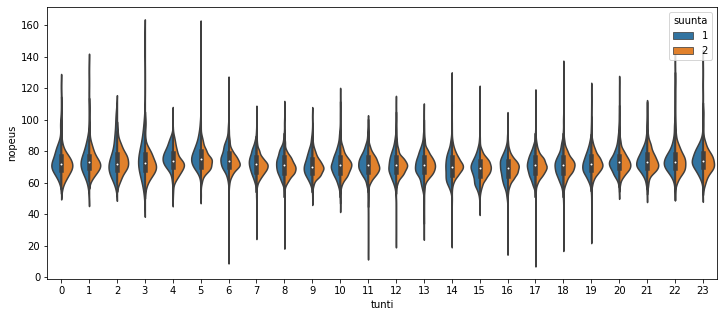

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/lam_raw.csv', sep=';', header=None)
df.columns=['pistetunnus','vuosi','päivän järjestysnumero','tunti','minuutti','sekunti','sadasosasekunti','pituus (m)','kaista','suunta','ajoneuvoluokka','nopeus','faulty','kokonaisaika (tekninen)','aikaväli (tekninen)','jonoalku (tekninen)']

df.head()

print(df['faulty'].value_counts())

df = df[df['faulty']==0]

#keskinopeus tunneittain
df.groupby('tunti')['nopeus'].mean().plot()
plt.ylabel('keskinopeus')
plt.show()


# nopeujakauma ajoneuvoluokittain
sns.violinplot(x='ajoneuvoluokka', y='nopeus', hue='suunta', split=True, data=df)
plt.show()



# nopeujakauma tunneittain
sns.violinplot(x='tunti', y='nopeus', hue='suunta', split=True, data=df)
fig = plt.gcf()  #antaa nykyisen kuvion (current figure)
fig.set_size_inches(12, 5)
plt.show()

## 4. Sää

Lue tiedosto https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/saa_jkl20200229.csv DataFrameen ja tee subplotia käyttäen 4 kaaviota (2 riviä, 2 saraketta) samaan kuvioon (figure):
* lumensyvydet tammi-helmikuun 2018, 2019 ja 2020 päiviltä samaan kaavioon. Korvaa ensin lumensyvyyden arvot -1 nollalla. Laske myös monesko päivä vuodesta on kyseessä ja laita tämä vaaka-akselille.
* laske kuinka monta cm enemmän/vähemmän lumensyvyys on ollut 2020 kuin 2019 tammi-helmikuun aikana, ja tee tästä erosta viivakaavio, vaaka-akselilla päivä
* laske kuinka paljon lumensyvyys on muuttunut edellisen päivän lukemasta ja tee näistä muutoksista histogrammi vuoden 2020 tammi-helmikuun päiviltä
* regplot ilman lämpötilasta ja päivittäisistä lumensyvyyden muutoksista vuoden 2020 tammi-helmikuulta


Laita kuvion kooksi 14 x 14 tuumaa

Malli (ei tarvitse olla täsmälleen samannäköinen):  
![malli4](https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/lumet2.png)


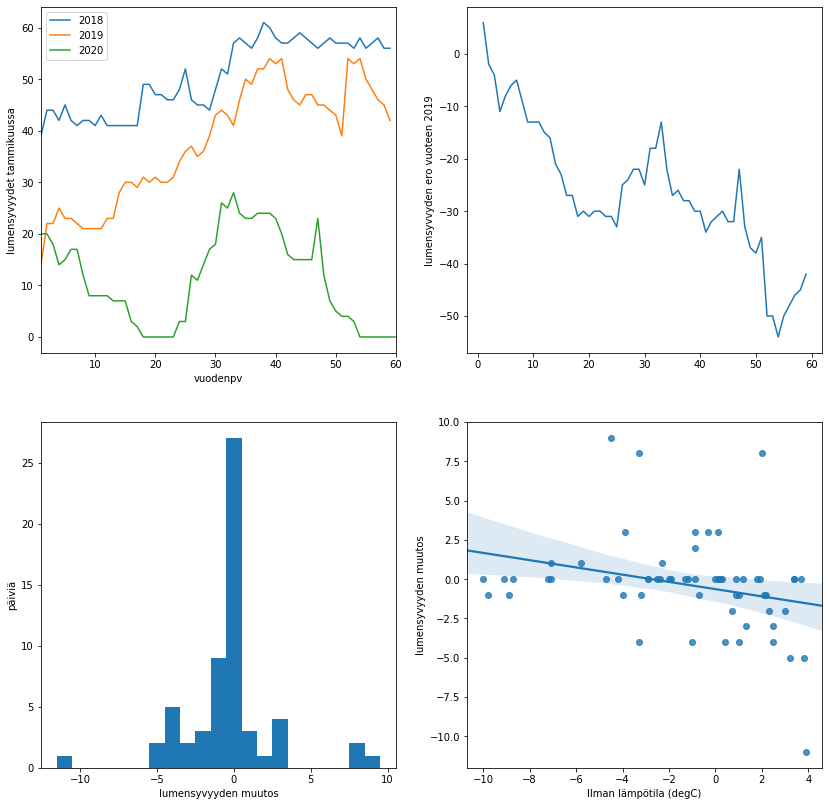

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/saa_jkl20200229.csv')

# tammi-helmikuulle päivien nrot
df['vuodenpv'] = df['Pv'] + 31*(df['Kk']==2)
# korvataan -1:t nollilla
df['Lumensyvyys (cm)'] = df['Lumensyvyys (cm)'].replace(-1,0)




plt.figure()  
ax1 = plt.subplot(2,2,1) 
df[(df['Kk']<3) & (df['Vuosi']==2018)].plot(x='vuodenpv', y='Lumensyvyys (cm)', label='2018', ax=ax1)
df[(df['Kk']<3) & (df['Vuosi']==2019)].plot(x='vuodenpv', y='Lumensyvyys (cm)', label='2019', ax=ax1)
df[(df['Kk']<3) & (df['Vuosi']==2020)].plot(x='vuodenpv', y='Lumensyvyys (cm)', label='2020', ax=ax1)
plt.legend()
plt.ylabel('lumensyvyydet tammikuussa')



ax2 = plt.subplot(2,2,2) 


#otetaan tammikuut 2019 ja 2020 omiin dataframeihin ja laitetaan päivä indeksiksi, jotta vähennyslasku onnistuu päiväkohtaisesti
df2 = df[(df['Kk']<3) & (df['Vuosi']==2019)].set_index('vuodenpv')
df3 = df[(df['Kk']<3) & (df['Vuosi']==2020)].set_index('vuodenpv')


plt.plot(df3['Lumensyvyys (cm)']-df2['Lumensyvyys (cm)'])
plt.ylabel('lumensyvvyden ero vuoteen 2019')


ax3 = plt.subplot(2,2,3) 

df['lumensyvyyden muutos'] = df['Lumensyvyys (cm)'].diff() # diff() antaa eron edelliseen riviin
df[(df['Kk']<3) & (df['Vuosi']==2020)]['lumensyvyyden muutos'].plot.hist(bins=np.arange(-11.5,10.5,1))
plt.ylabel('päiviä')
plt.xlabel('lumensyvyyden muutos')

ax4 = plt.subplot(2,2,4) 


sns.regplot(x='Ilman lämpötila (degC)', y='lumensyvyyden muutos', data=df[(df['Kk']<3) & (df['Vuosi']==2020)])

fig = plt.gcf()  #antaa nykyisen kuvion (current figure)
fig.set_size_inches(14, 14)

plt.show()

## 5. Variaatiokerroin

Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/kone5.csv on erään koneen toiminnasta mittaustulosksia 10 sekunnin välein.

Laske jokaiselle alkavalle tunnille mittaustuloksista `variaatiokerroin` (COV), joka määritellään **keskihajonta/keskiarvo** (siis kyseisen tunnin mittaustulosten keskihajonta ja keskiarvo, pura ensin tuntitieto päivä- ja aikasarakkeesta).

Tee sitten näistä COV-lukemista oheinen "kertymäkaavio", jossa vaaka-akselilla on luvut 0-100 kuvaamassa kuinka monta % COV-arvoista on alle tämän kohdan arvon, ja pystyakselilla COV-arvot.


Rajaa kaavion y-akseli välille 0 ... 0,1


Värjää pienin 30 % vihreällä ja suurin 15 % punaisella.


Malli:  
![malli5](https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/malli5.png)

Siis esim. kohdassa 60 kuvaaja on korkeudella n. 0,005 tarkoittaen, että 60 % tunneittaisista COV-arvoista on alle n. 0,005  
![malli5b](https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/malli5b.png)
(kaavioon ei näitä 60->0.005 -viivoja tarvitse piirtää)

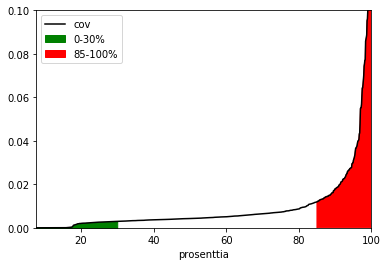

In [20]:
df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/kone5.csv')

df['tunti'] = df['date']+ ' ' + df['time'].str[:2] 


dfcov = df.groupby('tunti')['value'].std()/df.groupby('tunti')['value'].mean() 
#toki myöhemmin käydyllä resamplella menisi helpommin


dfcov2 = dfcov.sort_values() #sortataan pienimmästä suurimpaan
dfcov2 = dfcov2.to_frame()   # muutetaan series dataframeksi jotta voidaan lisätä sarakkeita


dfcov2['prosenttia']  =dfcov2['value'].rank(pct=True)*100  #lasketaan montako % on pienempiä

dfcov2.plot('prosenttia', 'value', color='black')
plt.fill_between(dfcov2[dfcov2['prosenttia']<30]['prosenttia'],dfcov2[dfcov2['prosenttia']<30]['value'],color='green')
plt.fill_between(dfcov2[dfcov2['prosenttia']>85]['prosenttia'],dfcov2[dfcov2['prosenttia']>85]['value'], color='red')

# tapa2
# plt.fill_between(dfcov2['prosenttia'],dfcov2['value'],color='green', where=dfcov2['prosenttia']<30)

# rajataan y-akselin asteikko
plt.ylim(0,0.1)
plt.legend(['cov', '0-30%', '85-100%'])
plt.show()